In [16]:
import zipfile
zip_ref = zipfile.ZipFile('YOUR DATA SET', 'r')
zip_ref.extractall('.')
zip_ref.close()

In [1]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import matplotlib.pyplot as plt

# Load Dataset

In [2]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [3]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

In [4]:
print('Shape of X_train: ', X_train.shape)
print('Shape of Y_train: ', Y_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of Y_test: ', Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


In [7]:
X_test = X_test/255
X_train = X_train/255

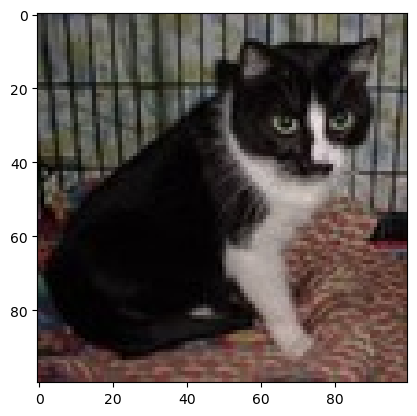

In [20]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

# Model

In [34]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D(),

    Flatten(),
    
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [42]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [43]:
model.fit(X_train, Y_train, epochs = 15, batch_size = 64)

Epoch 1/15
32/32 [==============================] - 5s 122ms/step - loss: 0.4501 - accuracy: 0.7935
Epoch 2/15
32/32 [==============================] - 4s 116ms/step - loss: 0.4090 - accuracy: 0.8140
Epoch 3/15
32/32 [==============================] - 4s 116ms/step - loss: 0.3523 - accuracy: 0.8470
Epoch 4/15
32/32 [==============================] - 4s 115ms/step - loss: 0.3052 - accuracy: 0.8705
Epoch 5/15
32/32 [==============================] - 4s 116ms/step - loss: 0.2596 - accuracy: 0.9005
Epoch 6/15
32/32 [==============================] - 4s 118ms/step - loss: 0.2165 - accuracy: 0.9210
Epoch 7/15
32/32 [==============================] - 4s 114ms/step - loss: 0.1966 - accuracy: 0.9245
Epoch 8/15
32/32 [==============================] - 4s 116ms/step - loss: 0.1506 - accuracy: 0.9485
Epoch 9/15
32/32 [==============================] - 4s 116ms/step - loss: 0.1366 - accuracy: 0.9610
Epoch 10/15
32/32 [==============================] - 4s 121ms/step - loss: 0.0970 - accuracy: 0.9735

In [46]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 0s 18ms/step - loss: 1.1264 - accuracy: 0.6900


[1.1264475584030151, 0.6899999976158142]

# Making Predictions

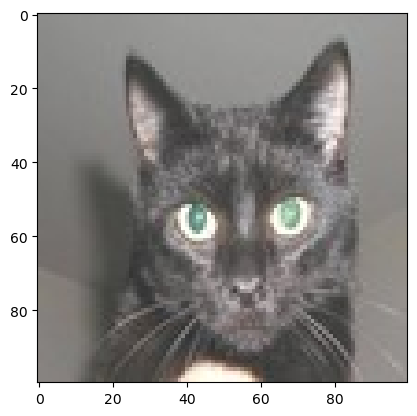

1/1 [==============================] - 0s 101ms/step
Our model says that it's a cat


In [47]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says that it's a", pred)